In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Example data
names = ["Full adversarial", "Mostly adversarial", "Full production", "Mostly production"]
opponent_names = ["Base Alpha-Beta", "MCTS", "Random"]

In [3]:
def plot_winrates(dfs, oppo_name):
    base_winrate = np.round([dfs[i]["winrate"][1] for i in range(len(dfs))])
    cus_winrate = np.round([dfs[i]["winrate"][0] for i in range(len(dfs))])
    winrates = {"Base agent": base_winrate, "Customized agent": cus_winrate}
    
    x = np.arange(len(names))  # the label locations
    width = 0.23  # the width of the bars, adjust as needed

    # Creating the bar chart
    fig, ax = plt.subplots()
    multiplier = 0

    for attribute, winrate in winrates.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, winrate, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Winrate')
    ax.set_title(f'Winrate against {oppo_name} agent')
    ax.set_xticks(x + width / 2, names)  # Positioning the x-ticks correctly
    ax.legend(loc='upper right', fontsize='small')
    ax.set_ylim(0, max(max(winrates['Base agent']), max(winrates['Customized agent'])) * 1.3)  # Adjust the y-limit
    plt.xticks(rotation=45)
    plt.show()

In [4]:
def plot_group(x_names, data_dict, title, width=0.2):
    x = np.arange(len(x_names)) 

    hatches = ['/', '-', '.', 'x']
#     colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf']
    colors = ['skyblue', 'lightcoral', 'bisque', 'plum']
    fig, ax = plt.subplots(figsize=(14, 6))
    multiplier = 0

    for (attribute, stat), hatch, color in zip(data_dict.items(), hatches, colors):
        offset = width * multiplier
        rects = ax.bar(x + offset, stat, width, label=attribute, hatch=hatch, color=color)
        ax.bar_label(rects, padding=5)  # Reduce padding if needed
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.

    # ax.set_ylabel('VPs')
    ax.set_title(title)
    ax.set_xticks(x + width * (len(data_dict) - 1) / 2, x_names)  # Positioning the x-ticks correctly
    ax.legend(handlelength=10, handleheight=3, handletextpad=2, markerscale=5, loc='best', fontsize='small')
    ax.set_ylim(0, max(map(max, data_dict.values()))  * 1.2)  # Adjust the y-limit
    plt.xticks(rotation=45)
    plt.show()


In [5]:
def plot_avg_turns(avg_turns, std_turns, oppo_name):
    # Creating the bar chart
    plt.bar(names, avg_turns, yerr=std_turns, capsize=5, color='skyblue')

    # Adding labels and title
    plt.xlabel('Catan Agents')
    plt.ylabel('Average Turns')
    plt.title(f'Mean number of turns against {oppo_name} agent')
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

In [6]:
# Replace with the actual path to your CSV file
csv_file = '/Users/jc/Downloads/game_test.csv'

# Read the CSV file
# df = pd.read_csv(csv_file)
game_total_df = pd.read_csv(csv_file)
game_dfs = []
chunk_size = 3
for chunk in pd.read_csv(csv_file, chunksize=chunk_size):
    chunk.reset_index(drop=True, inplace=True)
    game_dfs.append(chunk)
    
game_dfs[0].head()

,Unnamed: 0,AVG_TICKS,STD_TICKS,AVG_TURNS,STD_TURNS,AVG_DURATION,STD_DURATION,GAME_IDX,PLAYER1,PLAYER2
0,0,222.01,67.15,81.29,25.24,21.990 secs,185.164 secs,0,abFullAd,ab
1,0,977.67,458.47,379.90,188.76,55.687 secs,23.160 secs,1,abFullAd,mcts
2,0,1084.96,501.82,429.40,208.10,15.347 secs,9.749 secs,2,abFullAd,random


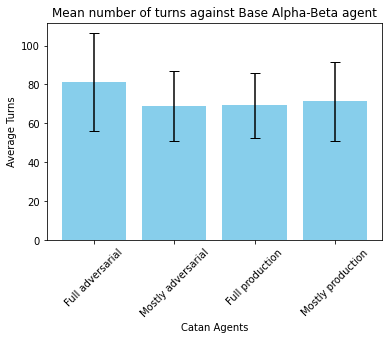

In [7]:
plot_avg_turns([df['AVG_TURNS'][0] for df in game_dfs], [df['STD_TURNS'][0] for df in game_dfs], opponent_names[0])

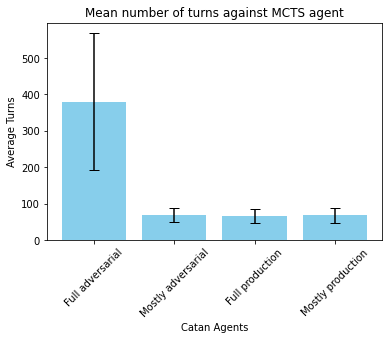

In [8]:
plot_avg_turns([df['AVG_TURNS'][1] for df in game_dfs], [df['STD_TURNS'][1] for df in game_dfs], opponent_names[1])

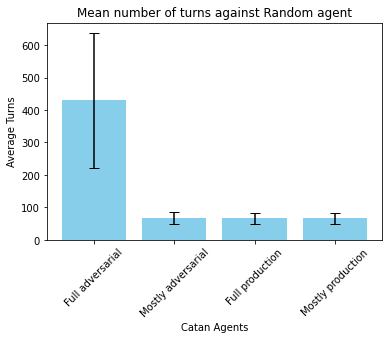

In [9]:
plot_avg_turns([df['AVG_TURNS'][2] for df in game_dfs], [df['STD_TURNS'][2] for df in game_dfs], opponent_names[2])

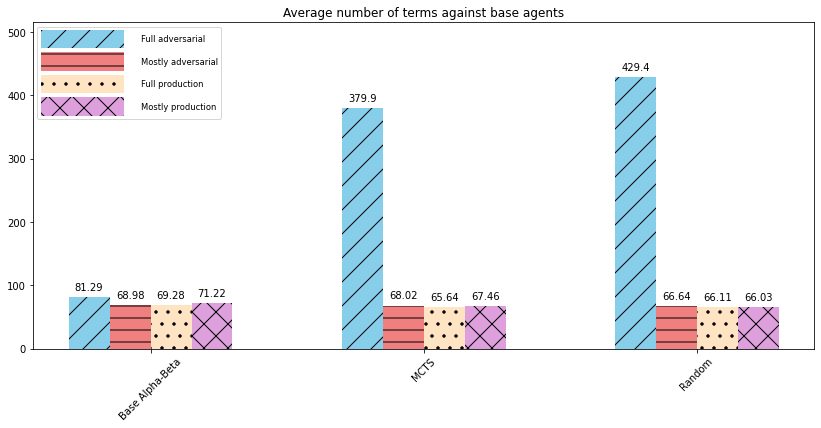

In [10]:
all_turn_datas = []
for i in range(4):
    turns = []
    turns.append(game_dfs[i]['AVG_TURNS'].to_numpy())
    all_turn_datas.append(turns)
    
all_turn_dict = {names[i] : all_turn_datas[i][0] for i in range(4)}

plot_group(opponent_names, all_turn_dict, width=0.15, title='Average number of terms against base agents')

In [11]:
# Replace with the actual path to your CSV file
csv_file = '/Users/jc/Downloads/player_test.csv'

# Read the CSV file
# df = pd.read_csv(csv_file)
total_df = pd.read_csv(csv_file)
dfs = []
chunk_size = 2
for chunk in pd.read_csv(csv_file, chunksize=chunk_size):
    total_games = chunk['WINS'].sum()
    chunk = chunk.drop('Unnamed: 1', axis=1)
    chunk = chunk.drop('Unnamed: 0', axis=1)
    chunk['winrate'] = chunk['WINS'] / total_games * 100
    chunk.reset_index(drop=True, inplace=True)
    dfs.append(chunk)
    
dfs[4].head()

,WINS,AVG_VP,STD_VP,AVG_SETTLES,STD_SETTLES,AVG_CITIES,STD_CITIES,AVG_ROAD,STD_ROAD,AVG_ARMY,STD_ARMY,AVG_DEV_VP,STD_DEV_VP,GAME_IDX,PLAYER_TYPE,winrate
0,200,10.03,0.16,2.77,39.05,2.61,36.73,0.99,14.0,0.01,0.07,0.03,0.42,4,abMixedAd,100.0
1,0,2.86,1.30,1.88,26.38,0.19,2.67,0.00,0.0,0.09,1.27,0.42,5.98,4,mcts,0.0


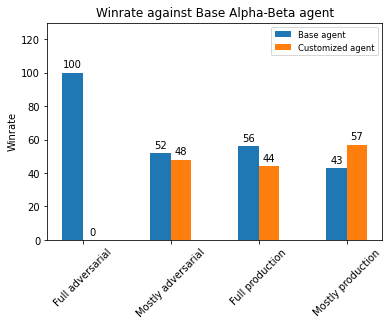

In [12]:
plot_winrates(dfs[0::3], "Base Alpha-Beta")

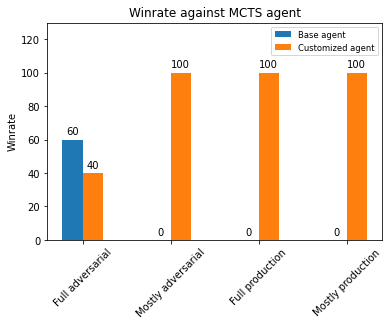

In [13]:
plot_winrates(dfs[1::3], "MCTS")

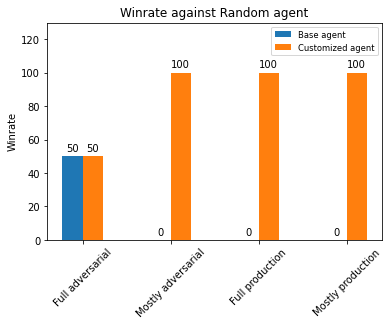

In [14]:
plot_winrates(dfs[2::3], "Random")

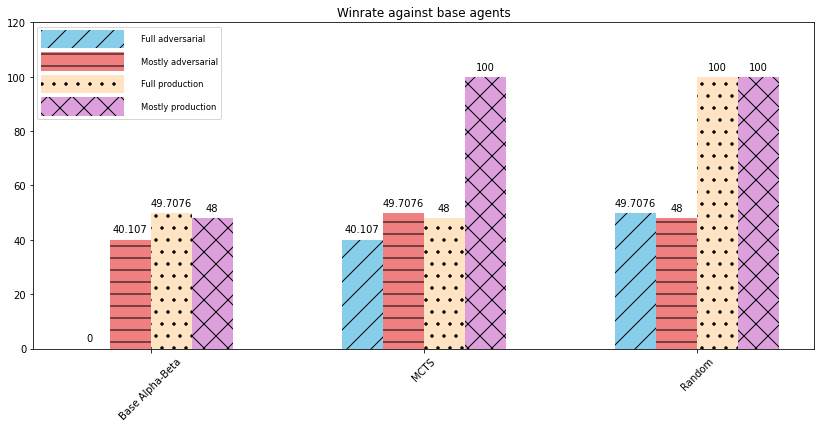

In [15]:
all_winrate_datas = []
for i in range(4):
    wins = []
    for j in range(3):
        wins.append(dfs[i+j]['winrate'][0])
    all_winrate_datas.append(wins)
all_winrate_dict = {names[i] : all_winrate_datas[i] for i in range(4)}

plot_group(opponent_names, all_winrate_dict, width=0.15, title='Winrate against base agents')

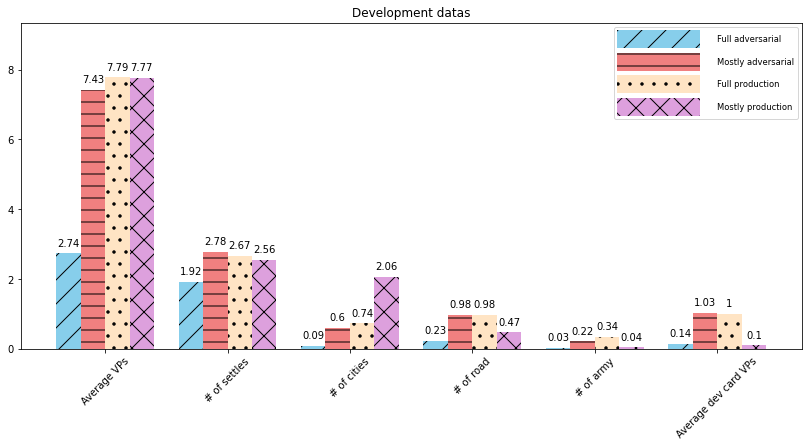

In [16]:
all_datas = []

for df in dfs:
    all_datas.append((df.iloc[0, 1:-3:2].to_numpy(), df.iloc[1, 1:-3:2].to_numpy()))
    
all_data_dic = {names[i]: all_datas[i][0] for i in range(4)}  # Example winrate data

stats_names = ["Average VPs", "# of settles", "# of cities", "# of road", "# of army", "Average dev card VPs" ]

plot_group(stats_names, all_data_dic, title='Development datas')